In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train,y_train=load_house_data()
X_features=['size(sqft)','bedrooms','floors','age']

In [3]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X_train)
print(f"Peak to Peak before normalization: {np.ptp(X_train,axis=0)}")
print(f"Peak to Peak before normalization: {np.ptp(X_norm,axis=0)}")

Peak to Peak before normalization: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak before normalization: [5.85 6.14 2.06 3.69]


In [12]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"The number of iterations completed: {sgdr.n_iter_}, no. of weight updates: {sgdr.t_}")

SGDRegressor()
The number of iterations completed: 101, no. of weight updates: 10000.0


In [14]:
b=sgdr.intercept_
w=sgdr.coef_
print(f"Model Parameters Now, w:{w} b:{b}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

Model Parameters Now, w:[109.63 -20.86 -32.23 -38.12] b:[363.16]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [15]:
y_pred_sgd=sgdr.predict(X_norm)
y_pred=np.dot(X_norm,w)+b
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred==y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.23 485.7  389.61 491.86]
Target values 
[300.  509.8 394.  540. ]


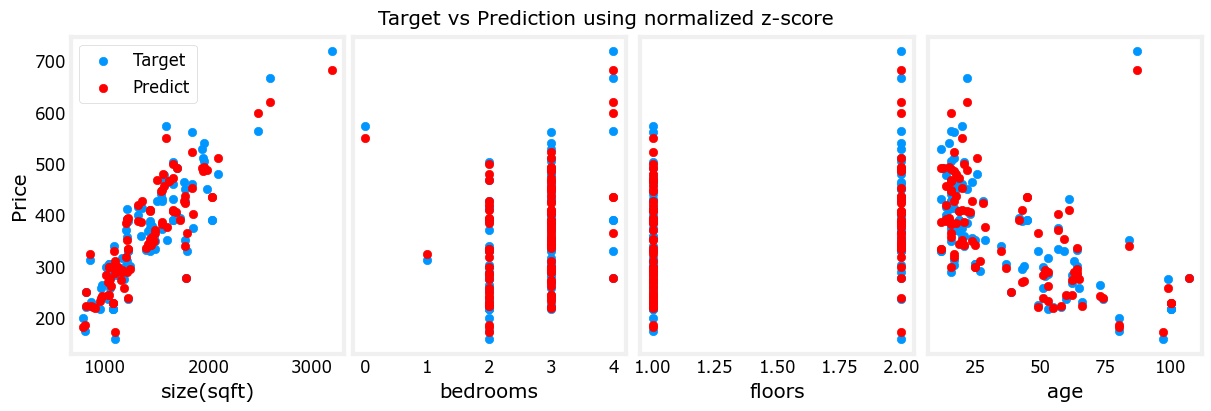

In [22]:
fig,ax=plt.subplots(1,4,constrained_layout=True,figsize=(12,4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='Target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color="red",label='Predict')
ax[0].set_ylabel("Price");ax[0].legend();
fig.suptitle("Target vs Prediction using normalized z-score")
plt.show()